Title: Predicting Chest Pain Type Based on Resting Blood Pressure and Cholesterol Level in Patients at Risk of Heart Disease.

Introduction:

A new prediction model, using test results from the Cleveland Clink in Ohio predicted the diagnoses of heart disease based on numeric, integer and categorical variables. This model was then applied to a new group of 425 patients who were going through the process of angiography, which is the examination of blood vessels via X ray. We will repurpose the dataset used in this paper 

In this project, we inquire as to whether we can use classification to predict the chest pain type (cp) an individual could suffer from based on Resting Blood Pressure (trestbps) and Serum Cholesterol in mg/dl (chol). The chest pain types include: (value 1: typical angina, value 2: atypical angina, value 3: non-anginal pain, value 4: asymptomatic). Angina (chest pain) is a primary indicator of heart disease and the types of pain experienced can be used to diagnose and assess the severity of the condition (Nakias et al., 2018). 

As high levels of cholesterol and irregular resting blood have correlation with atypical angina (Mosby, 2004), we are curious to see if these variables can predict the kinds of chest pain in patients with heart disease.

Predicting chest pain type can be beneficial to individuals at risk of heart disease as healthcare providers can identify what symptoms a patient should be monitoring for in order to get crucial care faster. The multivariate dataset we will be using to make these classifications is the Heart Disease dataset from the subject of Health and Medicine.

Methods:

We will be making a model for classification data analysis which can determine the categorical label “type of heart pain patients have” based on their “resting blood pressure” and “cholesterol”.
We will be keeping the columns cp (chest pain type), resting blood pressure (resting blood pressure), and cholesterol (chol) (serum cholesterol in mg/dl)
We will standardize our variables for comparison
Our classification model will produced using tidymodels, 
We will split the data by 80:20 to form training and testing sets of data then further split our training data to 
We will evaluate our model using the “metrics” function on “accuracy”, “precision” and “recall”
Visualize the results of our evaluation of our classifier on a scatter plot, specifically plot metrics like accuracy vs. k
We will classify the chest pain as one of the four categories:
1: typical angina
2: atypical angina
3: non-anginal pain
4: asymptomatic


Expected outcomes and significance:


What do you expect to find? 
We expect to be able to predict and classify the type of chest pain a patient is experiencing as typical angina, atypical angina, non-anginal pain, or asymptomatic based only on the numerical categories: cholesterol and resting blood pressure. 
What impact could such findings have?
These findings could have impacts in the area of healthcare. It could be used to classify potential chest pain type based on physical testing (blood test for cholesterol and blood pressure cuff for measuring blood pressure)
What future questions could this lead to?
This classification could lead to future questions about how cholesterol levels and resting blood pressure levels are related to chest pain, and, in turn, related to heart disease. It would give healthcare professionals additional information to use in their clinics to better treat patients with chest pain and potentially heart disease.

Citations (APA): 

Nakias, N., Bechlioulis, A., & et. al.,. (2018, June 8). The importance of characteristics of angina symptoms for the prediction of coronary artery disease in a cohort of stable patients in the modern era. Hellenic Journal of Cardiology. https://www.sciencedirect.com/science/article/pii/S1109966618300277 
Mosby. (2004b, February 27). The relation of the systolic blood pressure and heart rate to attacks of angina pectoris precipitated by effort. American Heart Journal. https://www.sciencedirect.com/science/article/abs/pii/S0002870336908839 


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [ ]:
Reading in the heart disease csv file from the dataset. 

In [16]:
heart_disease <- read_csv("data/heart_disease_uci.csv")
heart_disease

Rows: 920 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): sex, dataset, cp, restecg, slope, thal
dbl (8): id, age, trestbps, chol, thalch, oldpeak, ca, num
lgl (2): fbs, exang

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,63,Male,Cleveland,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160,286,FALSE,lv hypertrophy,108,TRUE,1.5,flat,3,normal,2
3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect,1
4,37,Male,Cleveland,non-anginal,130,250,FALSE,normal,187,FALSE,3.5,downsloping,0,normal,0
5,41,Female,Cleveland,atypical angina,130,204,FALSE,lv hypertrophy,172,FALSE,1.4,upsloping,0,normal,0
6,56,Male,Cleveland,atypical angina,120,236,FALSE,normal,178,FALSE,0.8,upsloping,0,normal,0
7,62,Female,Cleveland,asymptomatic,140,268,FALSE,lv hypertrophy,160,FALSE,3.6,downsloping,2,normal,3
8,57,Female,Cleveland,asymptomatic,120,354,FALSE,normal,163,TRUE,0.6,upsloping,0,normal,0
9,63,Male,Cleveland,asymptomatic,130,254,FALSE,lv hypertrophy,147,FALSE,1.4,flat,1,reversable defect,2


In [3]:
Classification <- read_csv("y.csv")
Classification

New names:
• `` -> `...1`
Rows: 303 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ...1, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,num
<dbl>,<dbl>
0,0
1,2
2,1
3,0
4,0
5,0
6,3
7,0
8,2


In [17]:
heart_disease_select <- heart_disease|>
select(trestbps,chol,cp)
heart_disease_select

trestbps,chol,cp
<dbl>,<dbl>,<chr>
145,233,typical angina
160,286,asymptomatic
120,229,asymptomatic
130,250,non-anginal
130,204,atypical angina
120,236,atypical angina
140,268,asymptomatic
120,354,asymptomatic
130,254,asymptomatic


In [18]:
set.seed(3456)

heart_disease_split <- initial_split(heart_disease_select, prop=0.75, strata=cp)
heart_disease_train<- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)
heart_disease_train
heart_disease_test

trestbps,chol,cp
<dbl>,<dbl>,<chr>
120,229,asymptomatic
140,268,asymptomatic
120,354,asymptomatic
140,203,asymptomatic
140,239,asymptomatic
150,226,typical angina
150,247,asymptomatic
140,239,typical angina
117,230,asymptomatic


trestbps,chol,cp
<dbl>,<dbl>,<chr>
160,286,asymptomatic
120,236,atypical angina
130,254,asymptomatic
140,192,asymptomatic
120,284,atypical angina
130,206,asymptomatic
110,167,asymptomatic
120,177,asymptomatic
150,276,asymptomatic


In [21]:
heart_disease_tidy <- heart_disease_train |>
group_by(cp)|>
summarize(mean_trestbps = mean(trestbps, na.rm=TRUE), mean_chol = mean(chol, na.rm=TRUE))
heart_disease_tidy

cp,mean_trestbps,mean_chol
<chr>,<dbl>,<dbl>
asymptomatic,132.5931,184.1047
atypical angina,128.9435,236.0806
non-anginal,130.5180,204.1849
typical angina,135.8182,199.6667


Warning message:
“Removed 62 rows containing missing values (`geom_point()`).”


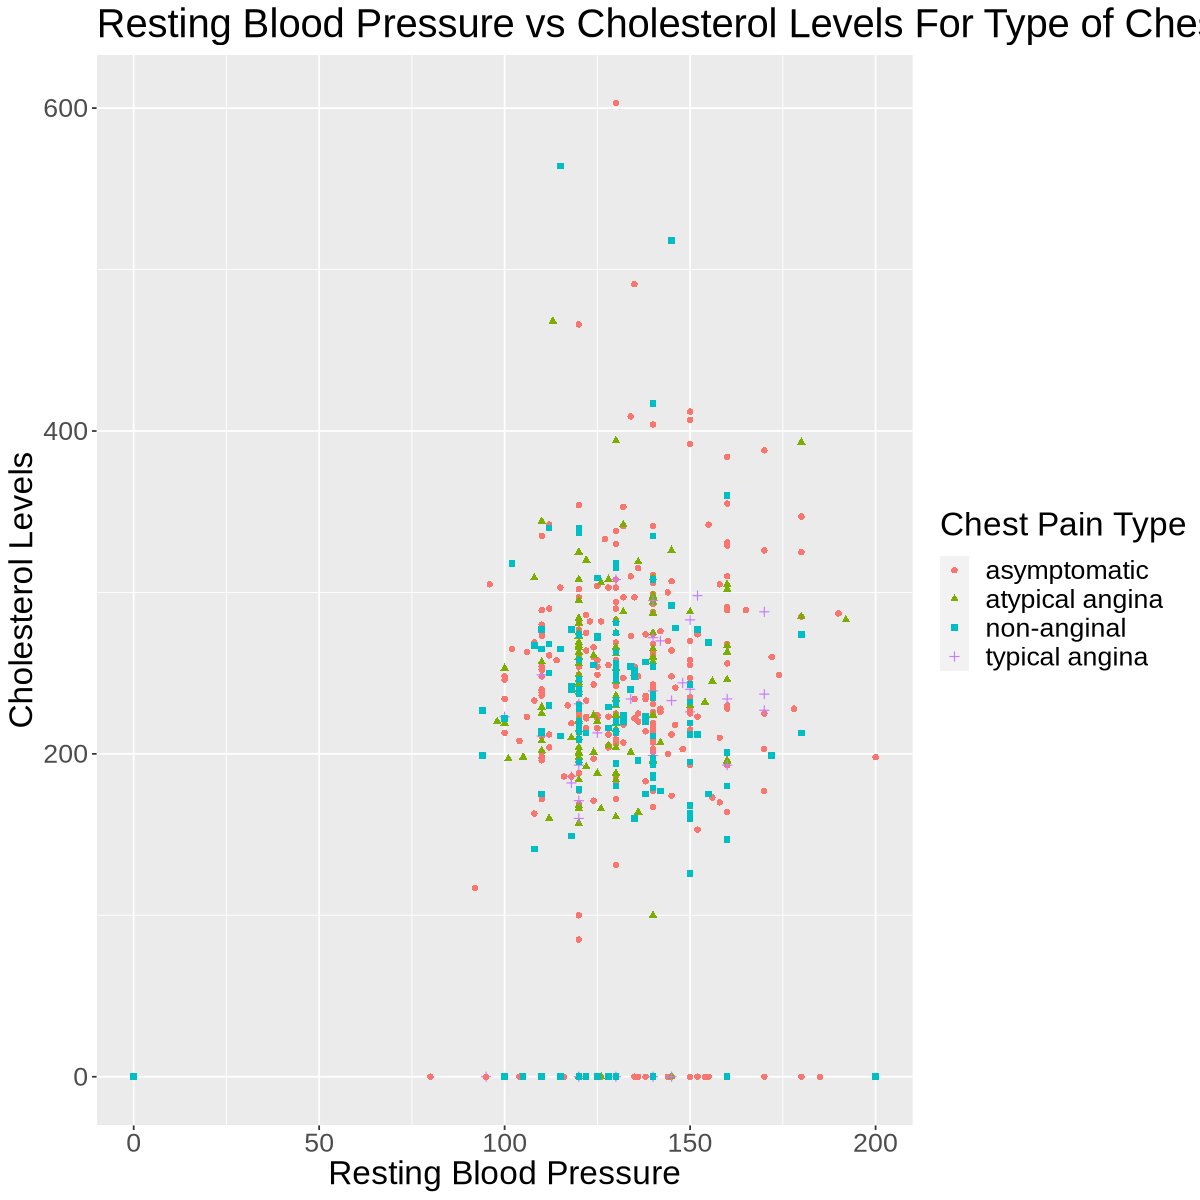

In [29]:
options(repr.plot.height=10, repr.plot.width=10)
Visualization <- heart_disease_train|>
ggplot(aes(x= trestbps, y= chol))+
       geom_point(aes(colour = cp, shape = cp)) +
labs(x = "Resting Blood Pressure", y = "Cholesterol Levels", colour = "Chest Pain Type", shape = "Chest Pain Type") +
ggtitle("Resting Blood Pressure vs Cholesterol Levels For Type of Chest Pain")+
  theme(text = element_text(size = 20))
Visualization